1.- En base a la siguiente figura,
Identifica de cada uno de los elementos (elementos específicos) su área, perímetro y
centroide, a cada uno de los objetos debe ser inscrito dentro un recuadro, una elipse,
un círculo y marcar una línea divisora en el medio tomando de referencia el centroide
(cada uno de estos conceptos en un subplot distinto) tomar en cuenta que el color de
las figuras mencionadas debe ser el mismo que tiene el objeto seleccionado.

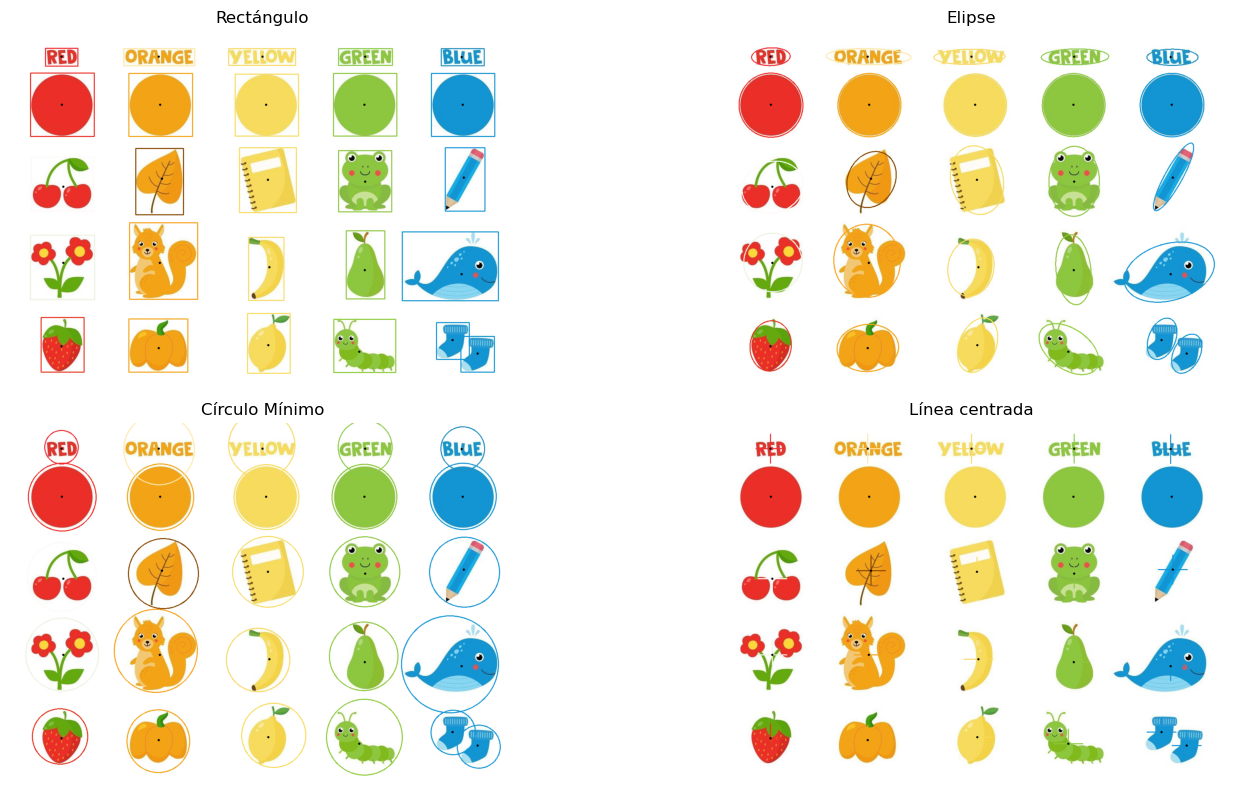

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "colores.jpg"  
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_box = image_rgb.copy()
image_ellipse = image_rgb.copy()
image_circle = image_rgb.copy()
image_line = image_rgb.copy()

for cnt in contours:
    if cv2.contourArea(cnt) < 1000:
        continue  

    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    M = cv2.moments(cnt)
    if M["m00"] == 0:
        continue
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
    centroid = (cx, cy)

    color = image_rgb[cy, cx].tolist()


    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image_box, (x, y), (x + w, y + h), color, 2)

   
    if len(cnt) >= 5:
        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(image_ellipse, ellipse, color, 2)

   
    (x_circ, y_circ), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x_circ), int(y_circ))
    radius = int(radius)
    cv2.circle(image_circle, center, radius, color, 2)

   
    cv2.line(image_line, (cx - 40, cy), (cx + 40, cy), color, 2)
    cv2.line(image_line, (cx, cy - 40), (cx, cy + 40), color, 2)

    for img in [image_box, image_ellipse, image_circle, image_line]:
        cv2.circle(img, (cx, cy), 3, (0, 0, 0), -1)

titles = ["Rectángulo", "Elipse", "Círculo Mínimo", "Línea centrada"]
images = [image_box, image_ellipse, image_circle, image_line]

plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()




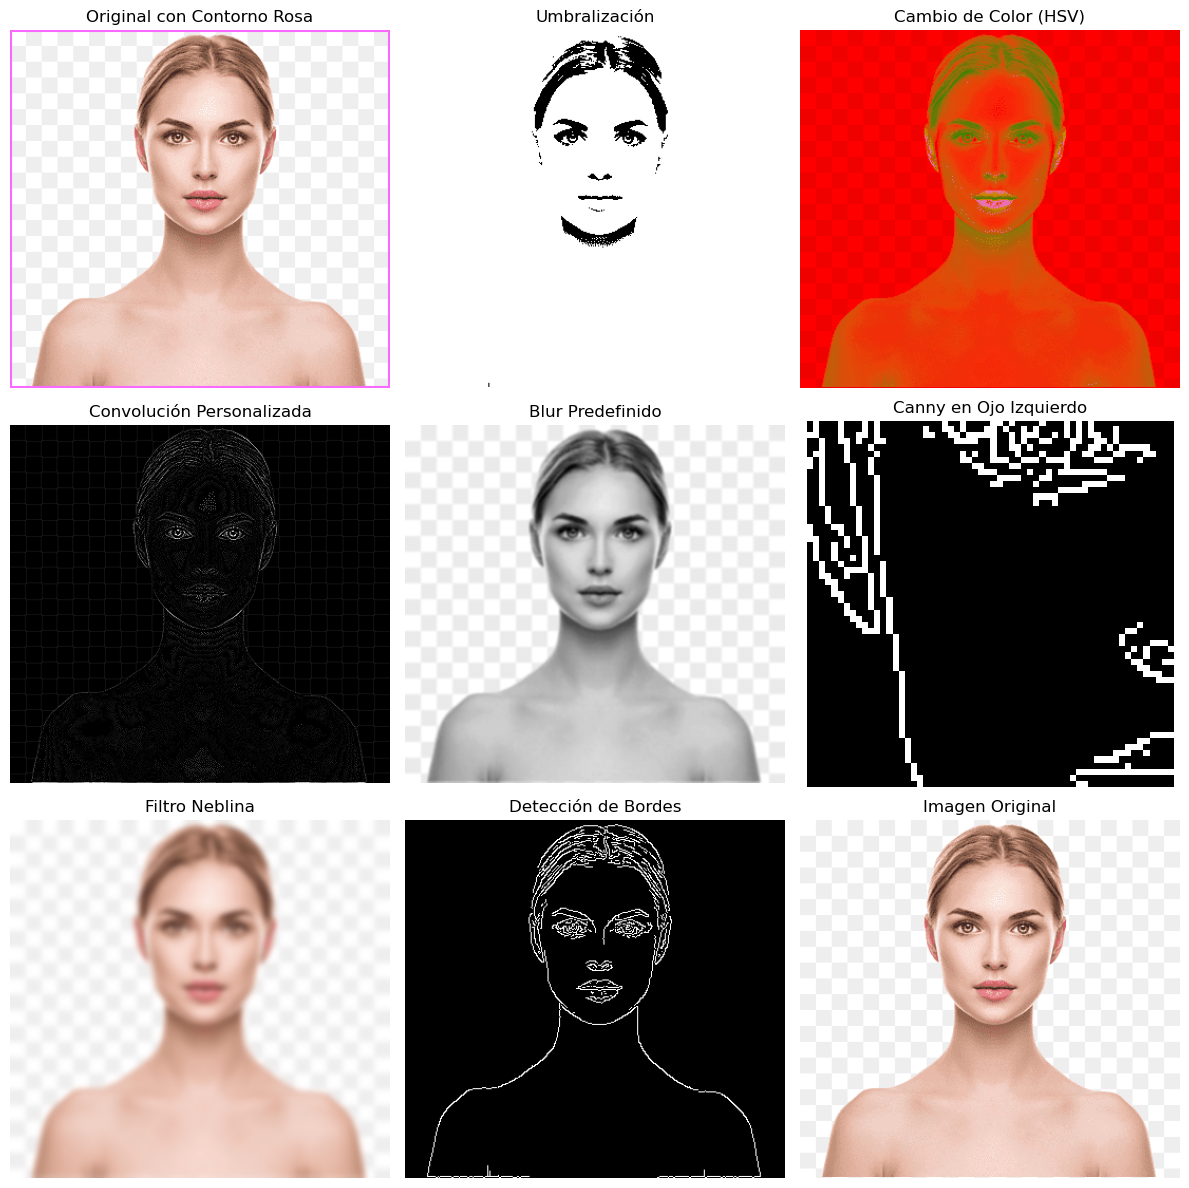

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread("IMG.png")

gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
_, umbralizada = cv2.threshold(gris, 128, 255, cv2.THRESH_BINARY)

hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

kernel_personalizado = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
imagen_convolucionada = cv2.filter2D(gris, -1, kernel_personalizado)

imagen_blur = cv2.GaussianBlur(gris, (5, 5), 0)
ojo_izquierdo = imagen[100:160, 120:180]
canny_ojo = cv2.Canny(ojo_izquierdo, 100, 200)
neblina = cv2.GaussianBlur(imagen, (15, 15), 0)
bordes = cv2.Canny(gris, 100, 200)

imagen_contornos_rosa = imagen.copy()

contornos, _ = cv2.findContours(umbralizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
color_rosa = (255, 105, 250)

for contorno in contornos:
    area = cv2.contourArea(contorno)
    perimetro = cv2.arcLength(contorno, True)
    M = cv2.moments(contorno)
    cx = int(M["m10"] / (M["m00"] + 1e-5))
    cy = int(M["m01"] / (M["m00"] + 1e-5))
    x, y, w, h = cv2.boundingRect(contorno)

    cv2.rectangle(imagen_contornos_rosa, (x, y), (x + w, y + h), color_rosa, 2)
    cv2.drawContours(imagen_contornos_rosa, [contorno], -1, color_rosa, 2)


fig, axs = plt.subplots(3, 3, figsize=(12, 12))

imagenes = [
    imagen_contornos_rosa, umbralizada, hsv,
    imagen_convolucionada, imagen_blur, canny_ojo,
    neblina, bordes, imagen
]
titulos = [
    "Original con Contorno Rosa", "Umbralización", "Cambio de Color (HSV)",
    "Convolución Personalizada", "Blur Predefinido", "Canny en Ojo Izquierdo",
    "Filtro Neblina", "Detección de Bordes", "Imagen Original"
]

for ax, img, titulo in zip(axs.flatten(), imagenes, titulos):
    if len(img.shape) == 2:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(titulo)
    ax.axis("off")

plt.tight_layout()
plt.show()


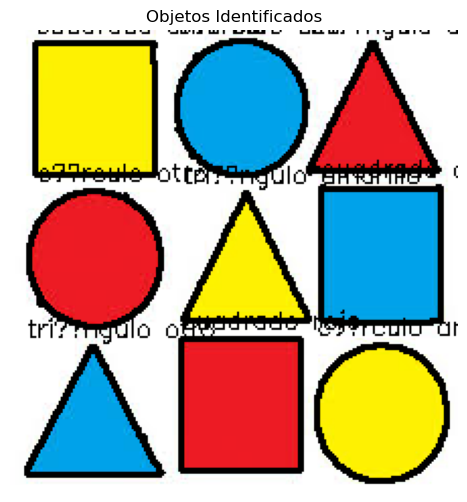

Conteo de Objetos Identificados:
Triángulo Azul: 1
Círculo Rojo: 0
Cuadrado Amarillo: 1


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('img2.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

_, binaria = cv2.threshold(imagen_gris, 240, 255, cv2.THRESH_BINARY_INV)
contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

conteo = {
    'Triángulo Azul': 0,
    'Círculo Rojo': 0,
    'Cuadrado Amarillo': 0
}

def clasificar_color(hsv):
    h, s, v = hsv
    if h < 10 or h > 160:
        return 'rojo'
    elif 20 < h < 35:
        return 'amarillo'
    elif 90 < h < 130:
        return 'azul'
    return 'otro'

for contorno in contornos:
    area = cv2.contourArea(contorno)
    if area > 300:
        approx = cv2.approxPolyDP(contorno, 0.04 * cv2.arcLength(contorno, True), True)
        x, y, w, h = cv2.boundingRect(approx)
        recorte_hsv = imagen_hsv[y:y+h, x:x+w]
        hsv_promedio = np.mean(recorte_hsv.reshape(-1, 3), axis=0)
        color = clasificar_color(hsv_promedio)

        if len(approx) == 3:
            forma = 'triángulo'
        elif len(approx) > 6:
            forma = 'círculo'
        elif len(approx) == 4:
            forma = 'cuadrado'
        else:
            forma = 'otro'

        etiqueta = f"{forma} {color}"
        if forma == 'triángulo' and color == 'azul':
            conteo['Triángulo Azul'] += 1
        elif forma == 'círculo' and color == 'rojo':
            conteo['Círculo Rojo'] += 1
        elif forma == 'cuadrado' and color == 'amarillo':
            conteo['Cuadrado Amarillo'] += 1
        cv2.drawContours(imagen_rgb, [contorno], -1, (0, 0, 0), 2)
        cv2.putText(imagen_rgb, etiqueta, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)

plt.figure(figsize=(10, 6))
plt.imshow(imagen_rgb)
plt.title("Objetos Identificados")
plt.axis('off')
plt.show()

print("Conteo de Objetos Identificados:")
for clave, valor in conteo.items():
    print(f"{clave}: {valor}")



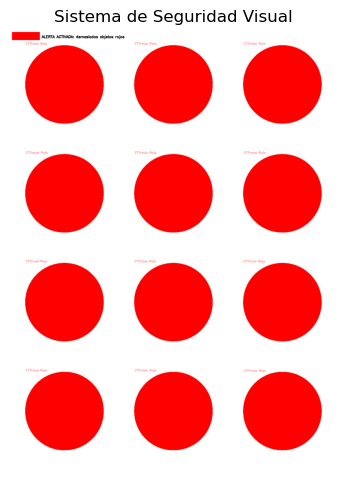

Círculos rojos detectados: 12
Estado del sistema: ALERTA ACTIVADA: demasiados objetos rojos


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('red.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

_, binaria = cv2.threshold(imagen_gris, 240, 255, cv2.THRESH_BINARY_INV)
contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

UMBRAL_CIRCULOS_ROJOS = 3
contador_circulos_rojos = 0

def clasificar_color(hsv):
    h, s, v = hsv
    if h < 10 or h > 160:
        return 'rojo'
    elif 35 < h < 85:
        return 'verde'
    elif 90 < h < 130:
        return 'azul'
    return 'otro'

for contorno in contornos:
    area = cv2.contourArea(contorno)
    if area > 300:
        approx = cv2.approxPolyDP(contorno, 0.04 * cv2.arcLength(contorno, True), True)
        x, y, w, h = cv2.boundingRect(approx)
        recorte_hsv = imagen_hsv[y:y+h, x:x+w]
        hsv_promedio = np.mean(recorte_hsv.reshape(-1, 3), axis=0)
        color = clasificar_color(hsv_promedio)

        if len(approx) > 6 and color == 'rojo':
            contador_circulos_rojos += 1
            cv2.drawContours(imagen_rgb, [contorno], -1, (255, 0, 0), 2)
            cv2.putText(imagen_rgb, "Círculo Rojo", (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

if contador_circulos_rojos > UMBRAL_CIRCULOS_ROJOS:
    estado_alerta = "ALERTA ACTIVADA: demasiados objetos rojos"
    color_alerta = (255, 0, 0)
else:
    estado_alerta = "Todo bajo control"
    color_alerta = (0, 255, 0)

cv2.rectangle(imagen_rgb, (10, 10), (150, 50), color_alerta, -1)
cv2.putText(imagen_rgb, estado_alerta, (160, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

plt.figure(figsize=(10, 6))
plt.imshow(imagen_rgb)
plt.axis('off')
plt.title("Sistema de Seguridad Visual")
plt.show()

print(f"Círculos rojos detectados: {contador_circulos_rojos}")
print(f"Estado del sistema: {estado_alerta}")

